Для инвестирования 5 млн руб. и cтавки купона, равного 20% разработайте внебиржевой опцион “Autocallable” с ежеквартальным купоном и возможностью досрочного автоматического погашения опциона каждые 3 месяца, если на ежеквартальную купонную дату текущая цена бумаги с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance) превышает или равна барьеру отзыва.

Если продукт не был отозван досрочно, и на последнюю купонную дату текущая цена worst of превышает или равна барьеру поставки, то продукт погашается с выплатой 100% номинала. Иначе, если хотя бы один базовый актив опциона оказался ниже барьера поставки, то осуществляется выплата денежных средств в сумме, равной эквиваленту «поставки бумаги», бумаги с наибольшим снижением относительно своей первоначальной стоимости, по ее первоначальной цене.

В корзину включить четыре базовых актива, первоначальную стоимость определить на день, предшествующий дате запуска (100%). Установить барьер отзыва 105%, купонный барьер 98%, барьер поставки 90% в процентах от первоначальной стоимости каждого базового актива корзину.

**Дата запуска:** 27-07-2022.

**Дата погашения:** 25-07-2023.

**Даты ежеквартальных наблюдений:** 25-10-2022, 25-01-2023, 25-04-2023.

1. Определить действия на купонные даты (выплачивается купон; выплачивается купон с досрочным погашением продукта; не выплачивается, но запоминается; выплачивается купон за текущий и предыдущие кварталы; производится погашение продукта с «эффектом поставки»).
1. Вычислить финансовый результат по состоянию на 25-04-2023,
определить бумагу с наибольшим снижением относительно своей первоначальной стоимости.
1. Привести иллюстративные графики, на которых отобразить бумагу с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance), купонные даты и действия в эти даты, уровни барьеров отзыва, поставки и купонного барьера, первоначальную стоимость актива,
провести исследование влияния уровней барьеров (барьер отзыва, купонный барьер, барьер поставки) на финансовый результат.
1. Повторить расчеты для метода оценки базовых активов -- средневзвешенная динамика стоимости всех активов (average-of perfomance).

[Примеры графиков и расчетов.](https://www.open-broker.com/files/Presentation_OTC-Option_Autocallable_.pdf)


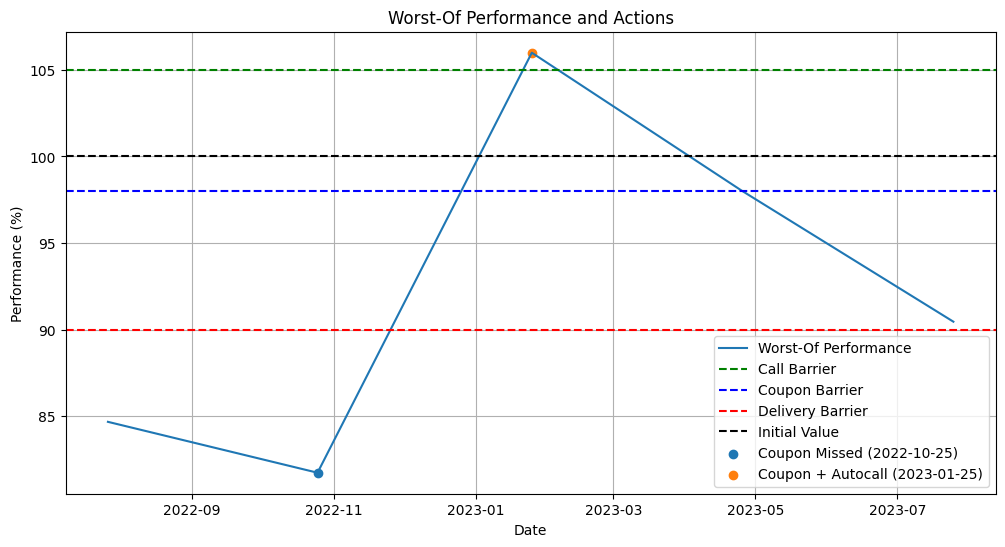

,Date,Worst-Of,Action
0,2022-10-25,81.742508,Coupon Missed
1,2023-01-25,105.985284,Coupon + Autocall


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
initial_value = 100  # 100%
call_barrier = 105  # 105%
coupon_barrier = 98  # 98%
delivery_barrier = 90  # 90%
coupon_rate = 0.20  # 20% annual coupon rate
investment = 5_000_000  # 5 million rubles

dates = ["2022-07-27", "2022-10-25", "2023-01-25", "2023-04-25", "2023-07-25"]
dates = pd.to_datetime(dates)


np.random.seed(42)
performance_data = pd.DataFrame({
    "Asset 1": np.random.uniform(85, 120, len(dates)),
    "Asset 2": np.random.uniform(80, 110, len(dates)),
    "Asset 3": np.random.uniform(90, 130, len(dates)),
    "Asset 4": np.random.uniform(95, 125, len(dates))
}, index=dates)


performance_data["Worst-Of"] = performance_data.min(axis=1)
performance_data["Average-Of"] = performance_data.mean(axis=1)


results = []
is_autocalled = False
total_coupons = 0

for i in range(1, len(dates) - 1):
    current_date = dates[i]
    worst_of = performance_data.loc[current_date, "Worst-Of"]
    action = None

    if worst_of >= call_barrier and not is_autocalled:
        action = "Coupon + Autocall"
        is_autocalled = True
        total_coupons += coupon_rate / 4 * investment
        results.append((current_date, worst_of, action))
        break
    elif worst_of >= coupon_barrier:
        action = "Coupon Paid"
        total_coupons += coupon_rate / 4 * investment
    else:
        action = "Coupon Missed"

    results.append((current_date, worst_of, action))

# Final maturity handling
final_date = dates[-1]
final_worst_of = performance_data.loc[final_date, "Worst-Of"]

if not is_autocalled:
    if final_worst_of >= delivery_barrier:
        action = "Full Redemption"
        total_coupons += coupon_rate / 4 * investment
    else:
        action = "Delivery Effect"

    results.append((final_date, final_worst_of, action))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Date", "Worst-Of", "Action"])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(performance_data.index, performance_data["Worst-Of"], label="Worst-Of Performance")
plt.axhline(call_barrier, color="green", linestyle="--", label="Call Barrier")
plt.axhline(coupon_barrier, color="blue", linestyle="--", label="Coupon Barrier")
plt.axhline(delivery_barrier, color="red", linestyle="--", label="Delivery Barrier")
plt.axhline(initial_value, color="black", linestyle="--", label="Initial Value")
for _, row in results_df.iterrows():
    plt.scatter(row["Date"], row["Worst-Of"], label=f"{row['Action']} ({row['Date'].date()})")

plt.title("Worst-Of Performance and Actions")
plt.xlabel("Date")
plt.ylabel("Performance (%)")
plt.legend()
plt.grid()
plt.show()

results_df